<a href="https://colab.research.google.com/github/alexiej/laboratory/blob/master/06_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code comes from the article: https://www.curiousily.com/posts/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python/?fbclid=IwAR3Bp0H4HzBKJQ-xWoT-wnX_OIJLmdLbA77-7uasU3Nxzs5W_O2lxp1N8N0

## INIT

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

## DATA

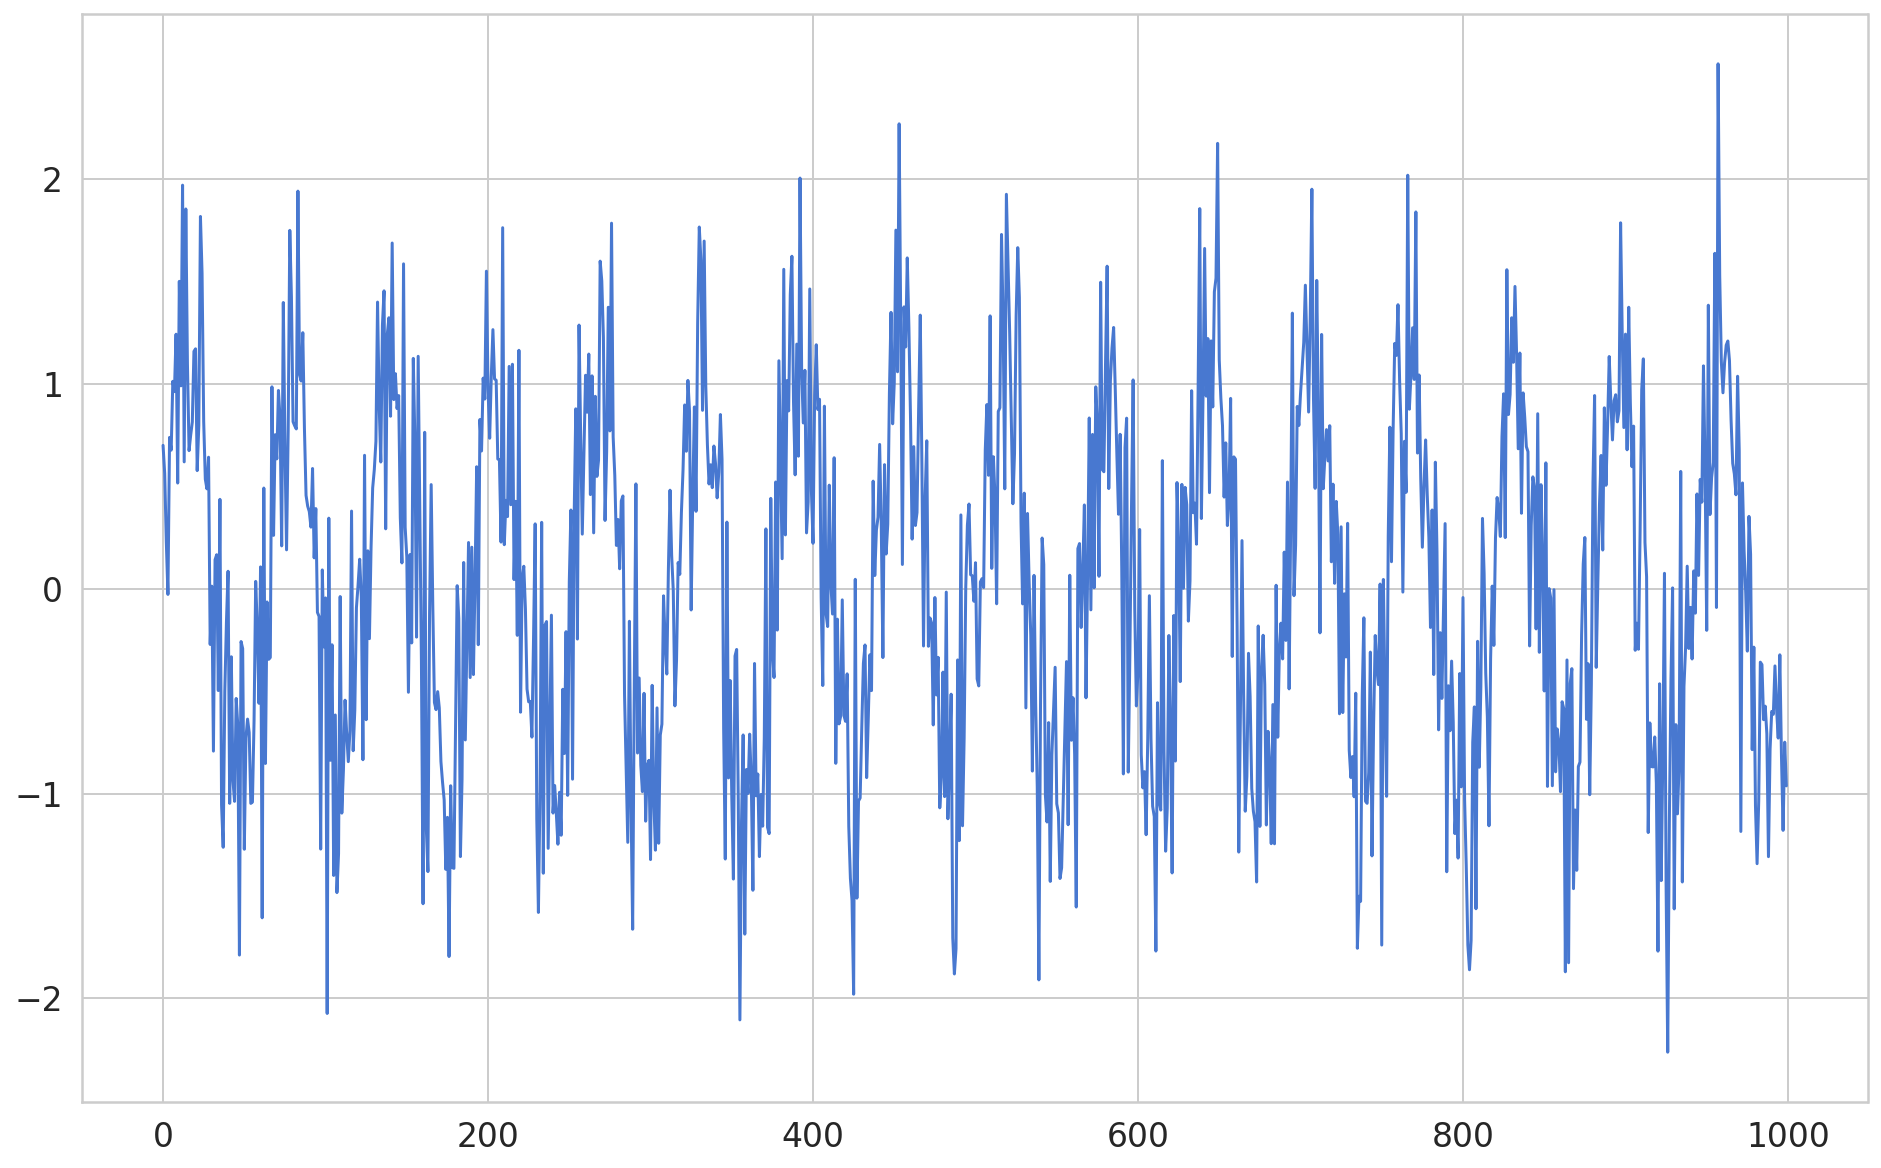

In [4]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))
plt.plot(sin)

## PREPROCESSING

In [5]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [7]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


## MODEL

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

## FIT

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 5s 8ms/sample - loss: 0.4817 - val_loss: 0.3631
Epoch 2/30
711/711 [==============================] - 0s 290us/sample - loss: 0.3481 - val_loss: 0.3221
Epoch 3/30
711/711 [==============================] - 0s 280us/sample - loss: 0.3339 - val_loss: 0.3168
Epoch 4/30
711/711 [==============================] - 0s 293us/sample - loss: 0.3310 - val_loss: 0.3138
Epoch 5/30
711/711 [==============================] - 0s 262us/sample - loss: 0.3292 - val_loss: 0.3117
Epoch 6/30
711/711 [==============================] - 0s 279us/sample - loss: 0.3280 - val_loss: 0.3102
Epoch 7/30
711/711 [==============================] - 0s 271us/sample - loss: 0.3272 - val_loss: 0.3090
Epoch 8/30
711/711 [==============================] - 0s 281us/sample - loss: 0.3265 - val_loss: 0.3080
Epoch 9/30
711/711 [==============================] - 0s 302us/sample - loss: 0.3259 - val_loss: 0.3071
Epoch 10/30
711/711 [

In [17]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

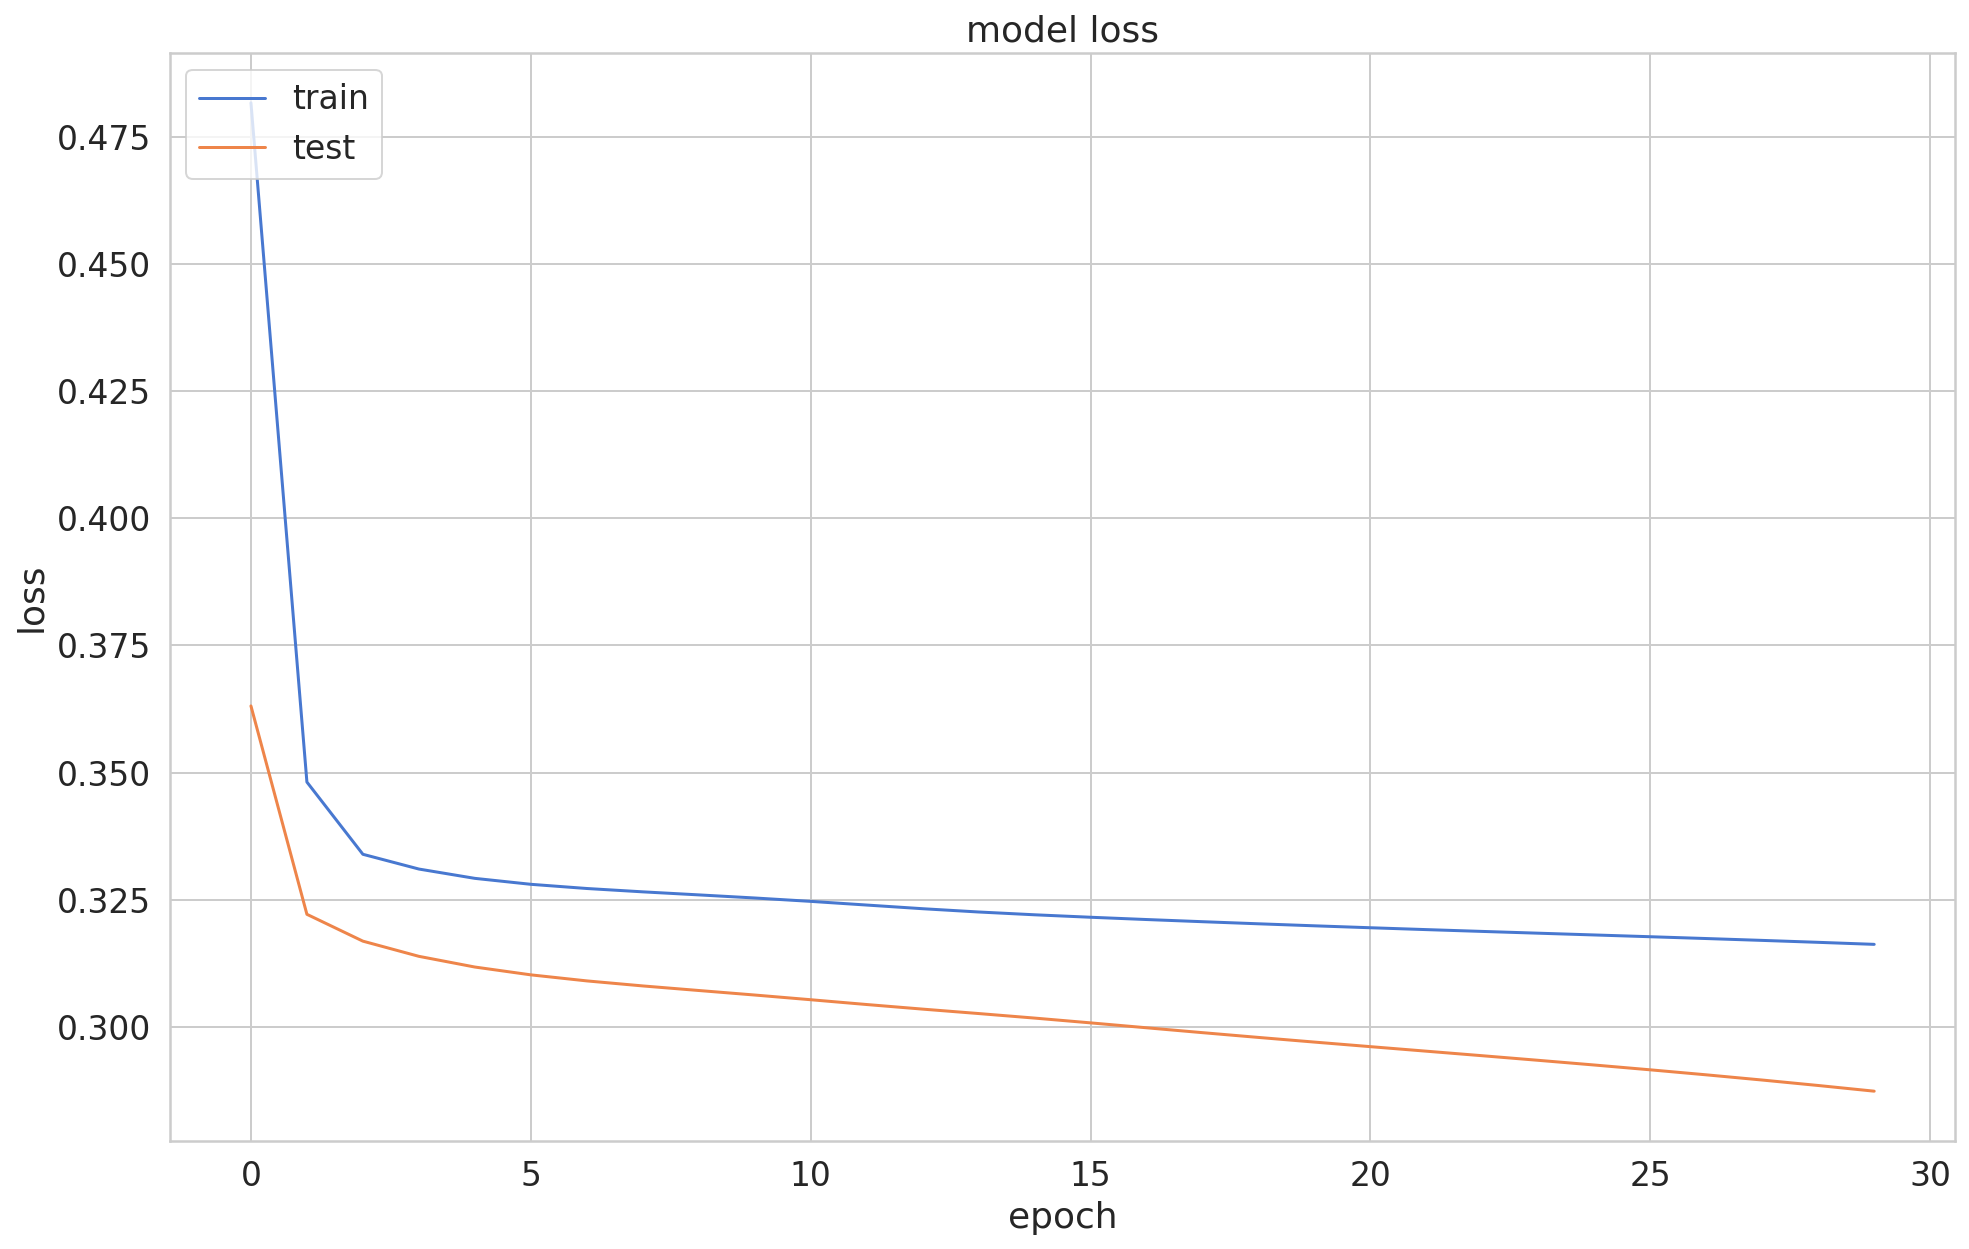

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## PREDICT

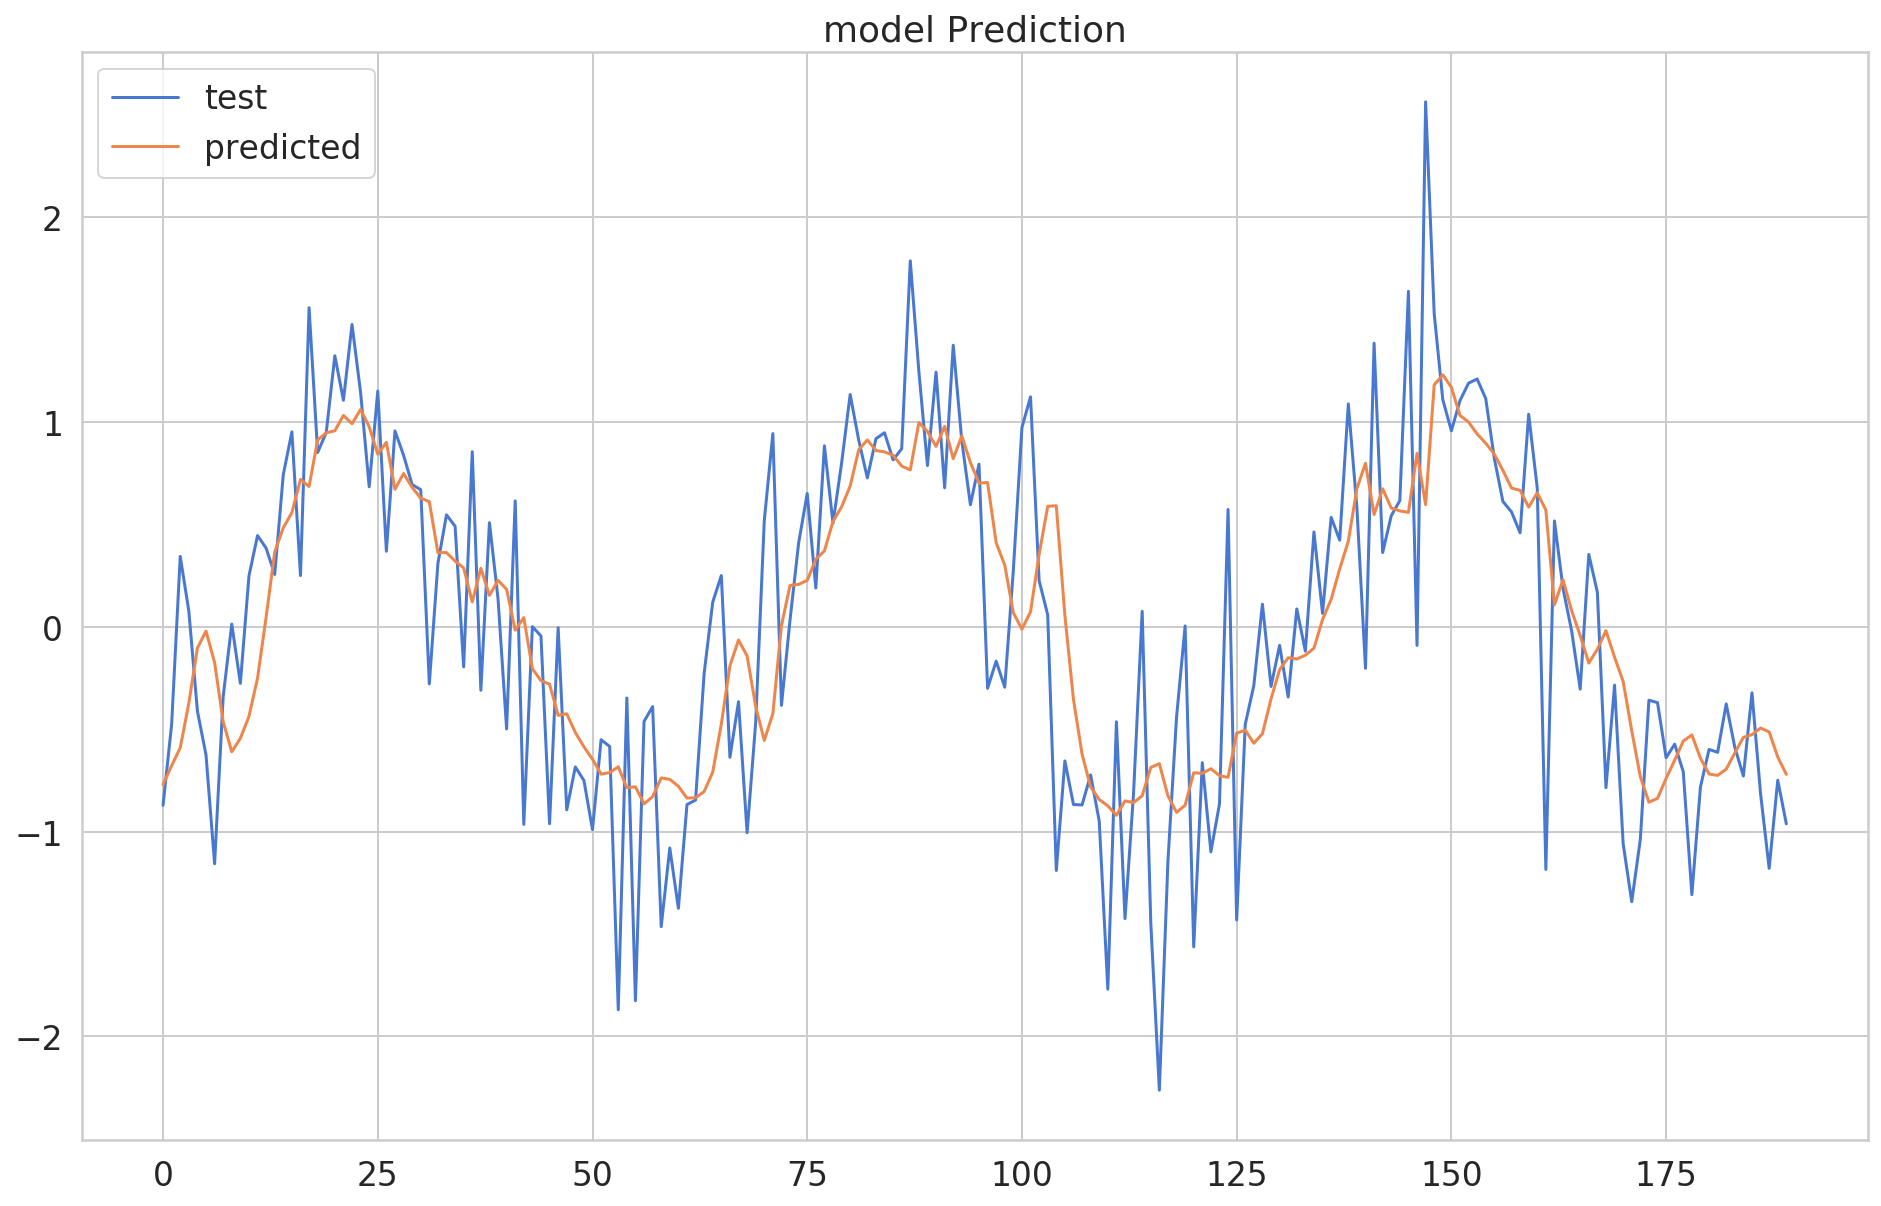

In [23]:
y_pred = model.predict(X_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.title('model Prediction')
plt.legend(['test', 'predicted'], loc='upper left')
plt.show()